<a href="https://colab.research.google.com/github/Alenushka2013/Coursera/blob/master/2_4_%D0%A1%D0%B3%D0%BB%D0%B0%D0%B6%D0%B8%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np


In [47]:
df = pd.read_excel('/content/df.xlsx', index_col = 1)

In [48]:
df

,Unnamed: 0,Bottom hole pressure
MOMENT,,
2023-07-21 02:25:00,145,7815.48040
2023-07-21 02:26:00,146,7806.19784
2023-07-21 02:27:00,147,7796.91528
2023-07-21 02:28:00,148,7787.63272
2023-07-21 02:29:00,149,7778.78528
...,...,...
2023-07-21 23:55:00,1435,7252.00000
2023-07-21 23:56:00,1436,7251.70992
2023-07-21 23:57:00,1437,7251.27480


In [51]:
df.rename(columns = {'Bottom hole pressure':'BHP'}, inplace = True)

In [52]:
df

,Unnamed: 0,BHP
MOMENT,,
2023-07-21 02:25:00,145,7815.48040
2023-07-21 02:26:00,146,7806.19784
2023-07-21 02:27:00,147,7796.91528
2023-07-21 02:28:00,148,7787.63272
2023-07-21 02:29:00,149,7778.78528
...,...,...
2023-07-21 23:55:00,1435,7252.00000
2023-07-21 23:56:00,1436,7251.70992
2023-07-21 23:57:00,1437,7251.27480


In [ ]:
! pip install sktime

In [54]:
from sktime.utils.plotting import plot_series

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='BHP'>)

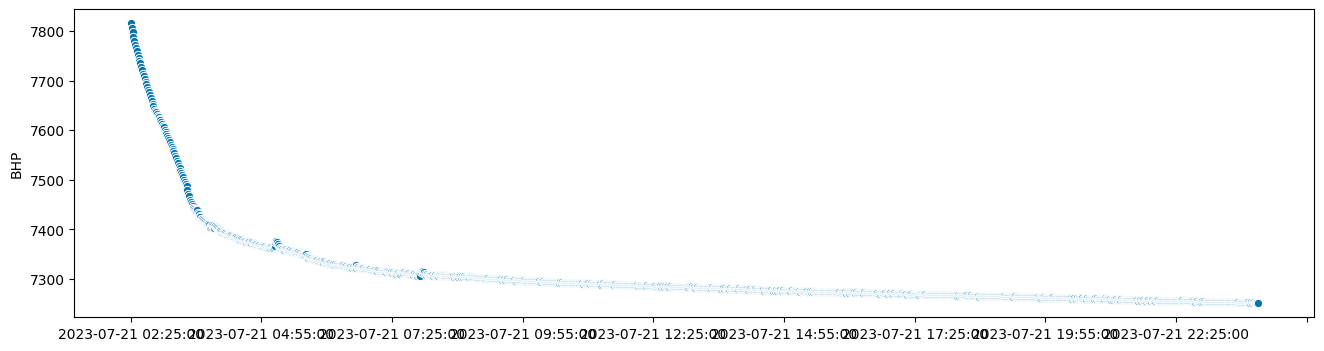

In [55]:
plot_series(df['BHP'])

In [57]:
df['BHPShift'] =df.BHP.shift(1)

In [58]:
df['diff'] = df['BHP'] - df['BHPShift']

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='diff'>)

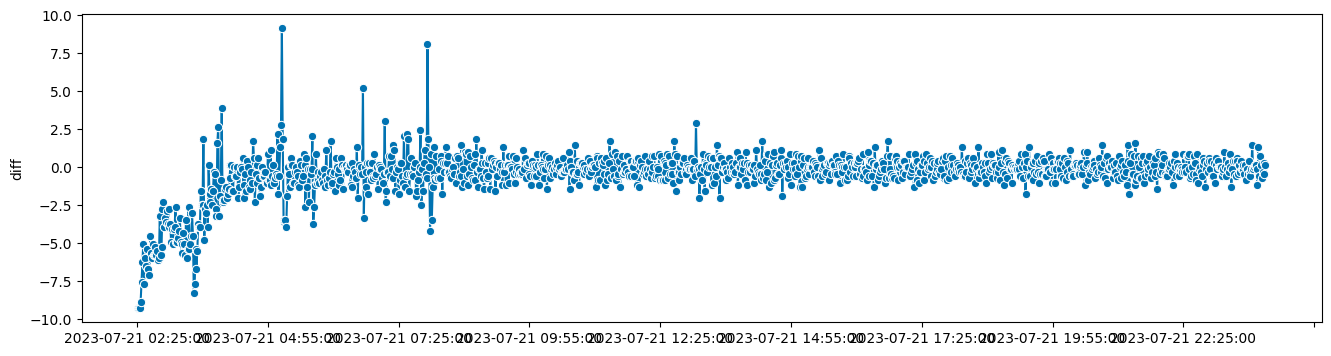

In [59]:
plot_series(df['diff'])

<Axes: >

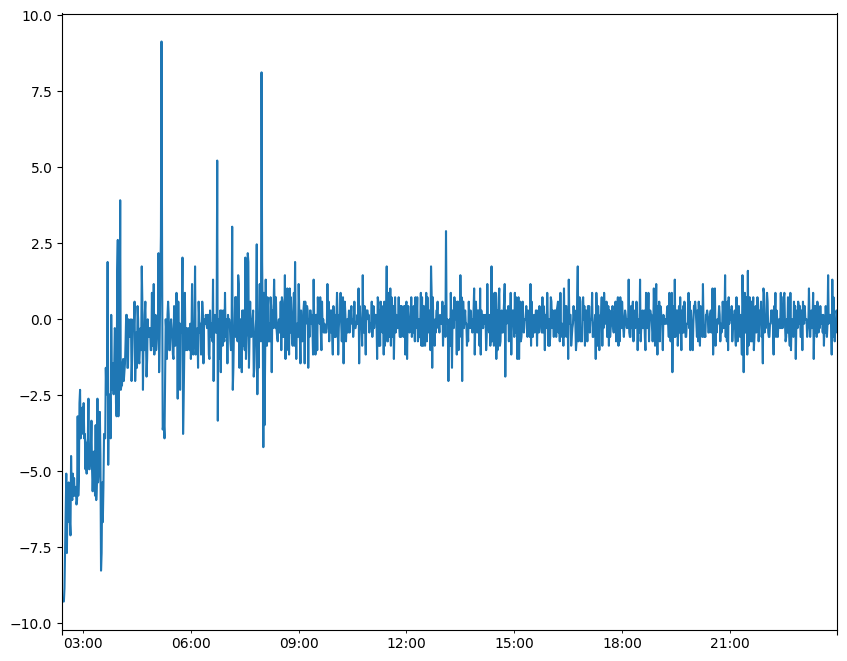

In [61]:
df['diff'].plot(figsize = (10, 8))

<Axes: >

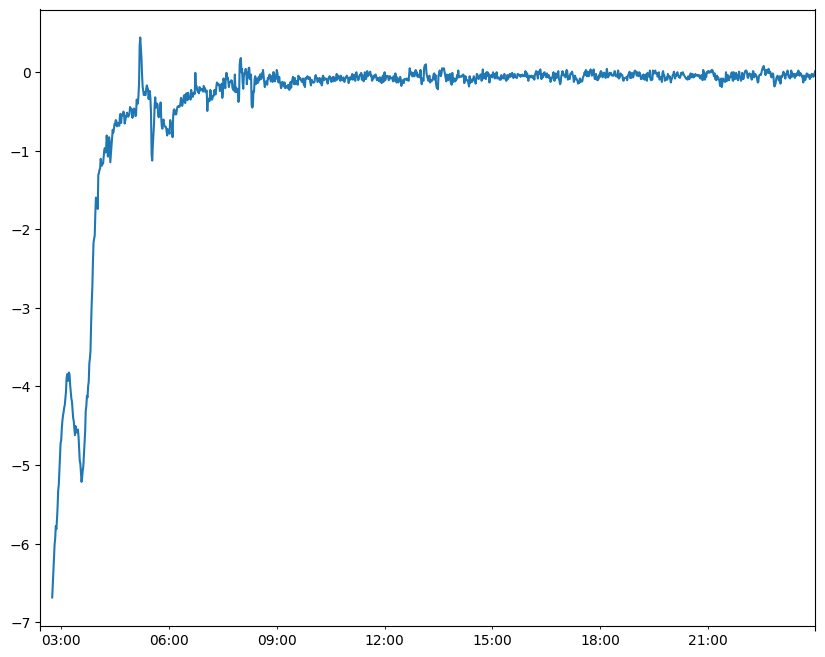

In [62]:
df['diff'].rolling(window = 20).mean().plot(figsize = (10, 8))

<Axes: >

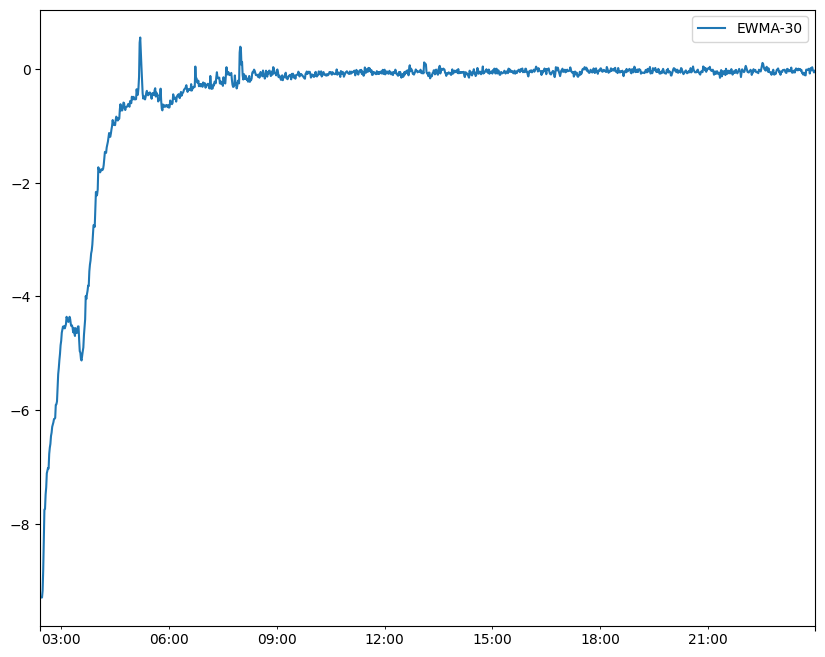

In [66]:
# create EWMA
df['EWMA-30'] = df['diff'].ewm(span = 30).mean()

# plot EWMA
df[['EWMA-30']].plot(figsize = (10, 8))

<Axes: >

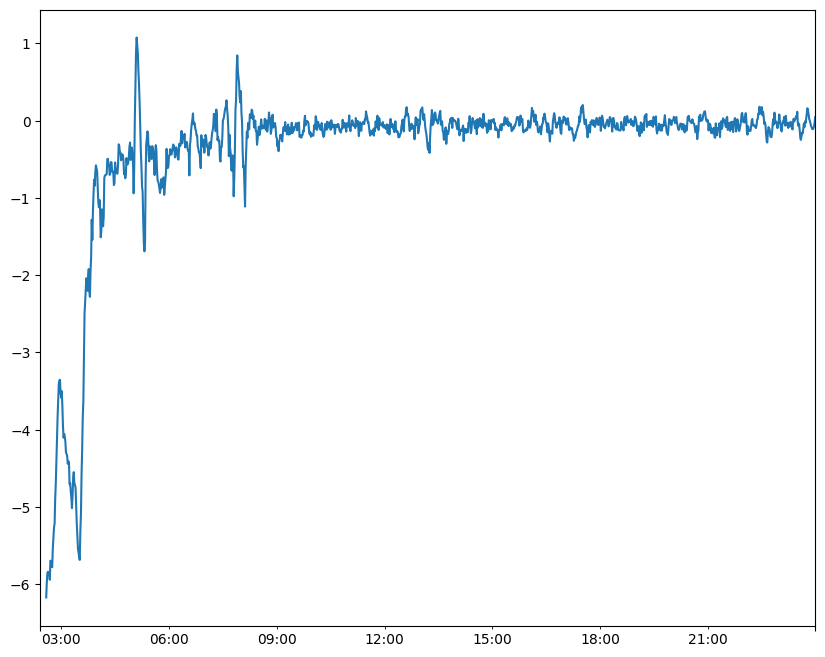

In [67]:
from scipy.signal import savgol_filter
df['savg'] = savgol_filter(df['diff'], 20, 3)
df['savg'].plot(figsize = (10, 8))

In [68]:
df['diff'][0]

nan